In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import PsnrSnr as p

<IPython.core.display.Javascript object>

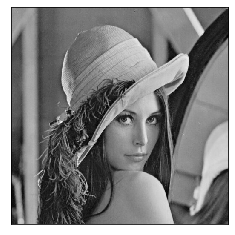

<IPython.core.display.Javascript object>

In [3]:
img = cv.imread("lena_gray.jpg", 0)
img = cv.resize(img, dsize=(512, 512)) 
width=512
height=512

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [4]:
i = 0
j = 0
luv = []

for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):

        luv.append([img[i, j], img[i + 1, j], img[i, j + 1], img[i + 1, j + 1]])

        j = j + 2

    i = i + 2

<IPython.core.display.Javascript object>

In [5]:
import time as t

cluster = 12

clusterssize = [cluster]  # 2, 3, 4, 5, 6, 7, 8, 9,
timearray = []
error = []
segementedImg = []

<IPython.core.display.Javascript object>

In [6]:
for i in clusterssize:

    start = t.time()
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=50, init="random").fit(luv)
    timearray.append(t.time() - start)
    segementedImg.append(kmeans.labels_)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]

<IPython.core.display.Javascript object>

In [7]:
centersp = (kmeans.cluster_centers_[kmeans.labels_]).reshape(
    int(width / 2), int(height / 2), 4
)

<IPython.core.display.Javascript object>

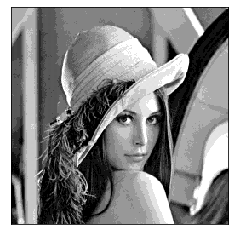

<IPython.core.display.Javascript object>

In [8]:
# convert back the clustered image to the original form
# decoding

temp = np.zeros((width, height))
i = 0
j = 0
for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):
        val = centersp

        temp[i, j] = val[h][k][0]
        temp[i + 1, j] = val[h][k][1]
        temp[i, j + 1] = val[h][k][2]
        temp[i + 1, j + 1] = val[h][k][3]

        j = j + 2
    i = i + 2

plt.imshow(temp, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig("Kmeans_SegementdIMg_" + str(cluster) + ".jpg")
plt.show()

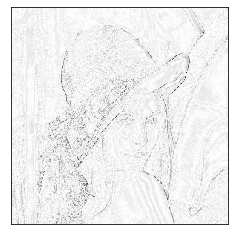

<IPython.core.display.Javascript object>

In [9]:
plt.imshow(256 - abs(img - temp), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig("Kmeans_SegementdIMg_error_" + str(cluster) + ".jpg")
plt.show()

In [10]:
psnr = p.psnr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

29.426362372653863

<IPython.core.display.Javascript object>

In [11]:
snr = p.snr(np.array(img).astype(int), np.array(temp).astype(int))
snr

15.645073920159831

<IPython.core.display.Javascript object>